Import used packages

In [1]:
import cv2
import os
import numpy as np
from algorithms import *
from IPython.display import Image

Define image path

In [2]:
image_path = './assets/low2.jpg'
file_extension = os.path.splitext(image_path)[1]
image_type = file_extension[1:].lower()

Load RGB image

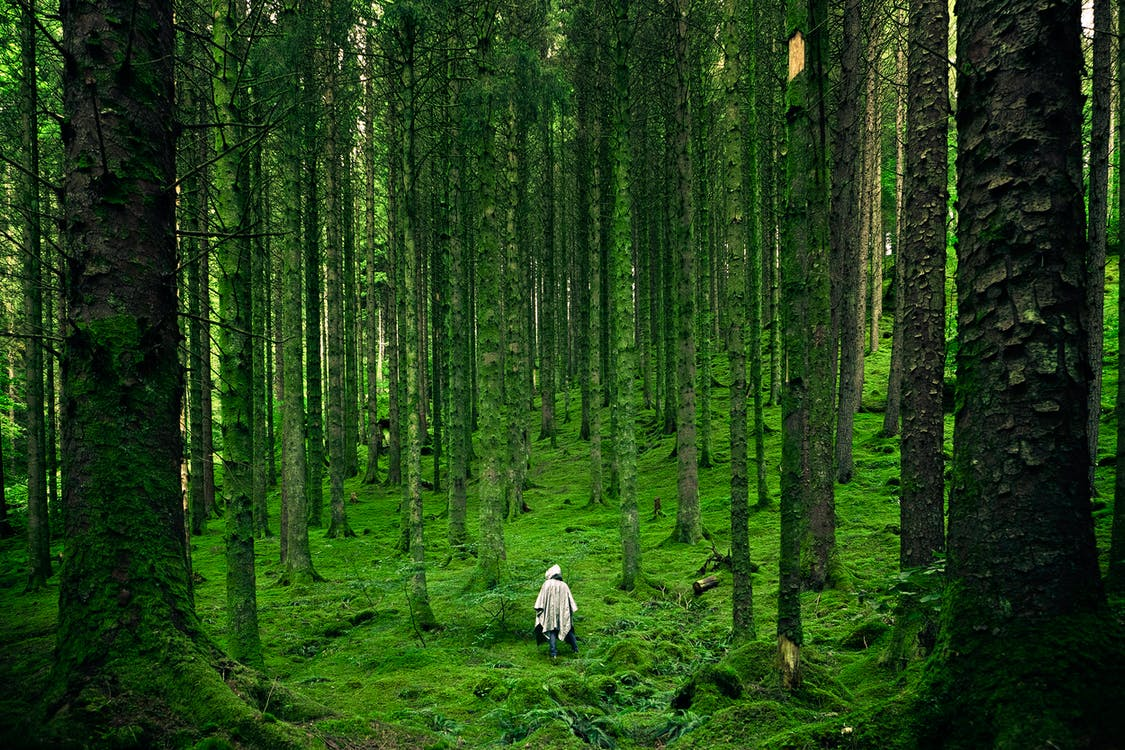

In [3]:
# Load the image in color format
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
Image(filename=image_path)

Change image to matrix

In [4]:
matrix = np.float32(img)

# Print the matrix shape
print("Matrix shape:", matrix.shape)

Matrix shape: (750, 1125, 3)


In [5]:
original_size, _ = save_image(matrix, image_type, onlySize=True)

Image size: 0.2473 mb


Split the image into three separate color channels

In [6]:
# Slice the third dimension of the array

b = matrix[:,:,0]
g = matrix[:,:,1]
r = matrix[:,:,2]

Apply SVD to each channel

In [7]:
U_b, S_b, Vt_b = svd(b)
U_g, S_g, Vt_g = svd(g)
U_r, S_r, Vt_r = svd(r)

Find the Number of singular Values

In [8]:
num_sv = 112

Choosing the best value of the number of singular values by certain percentage chosen of total energy captured

In [9]:
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
num_sv_r, cum_energy_r = find_num_sv(img, U_r, S_r, Vt_r, energy_ratio=0.95)
num_sv_b, cum_energy_b = find_num_sv(img, U_b, S_b, Vt_b, energy_ratio=0.95)
num_sv_g, cum_energy_g = find_num_sv(img, U_g, S_r, Vt_g, energy_ratio=0.95)

NameError: name 's_r' is not defined

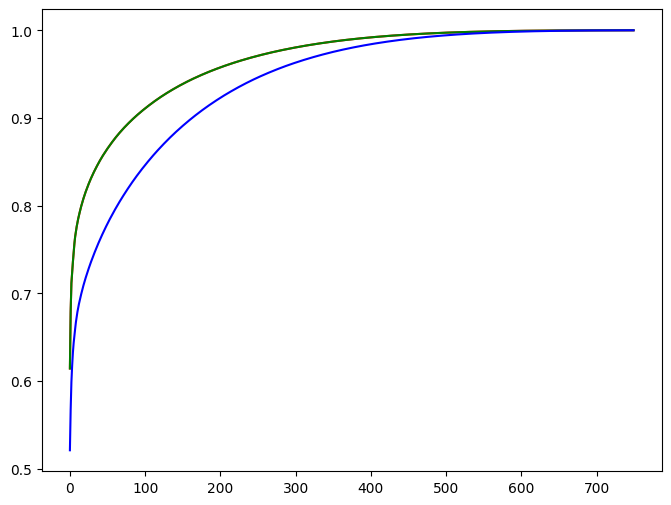

In [10]:
energy_ratio = 0.95
plot_cumulative_energy(cum_energy_r, cum_energy_g, cum_energy_b, energy_ratio, num_sv_r, num_sv_g, num_sv_b)

Trunctate the matrices U, S, V

In [ ]:
U_b_truncate, S_b_truncate, Vt_b_truncate = truncate(U_b, S_b, Vt_b, num_sv)
U_g_truncate, S_g_truncate, Vt_g_truncate = truncate(U_g, S_g, Vt_g, num_sv)
U_r_truncate, S_r_truncate, Vt_r_truncate = truncate(U_r, S_r, Vt_r, num_sv)

Compress Channels

In [ ]:
b_compressed = compress(U_b_truncate, S_b_truncate, Vt_b_truncate)
g_compressed = compress(U_g_truncate, S_g_truncate, Vt_g_truncate)
r_compressed = compress(U_r_truncate, S_r_truncate, Vt_r_truncate)


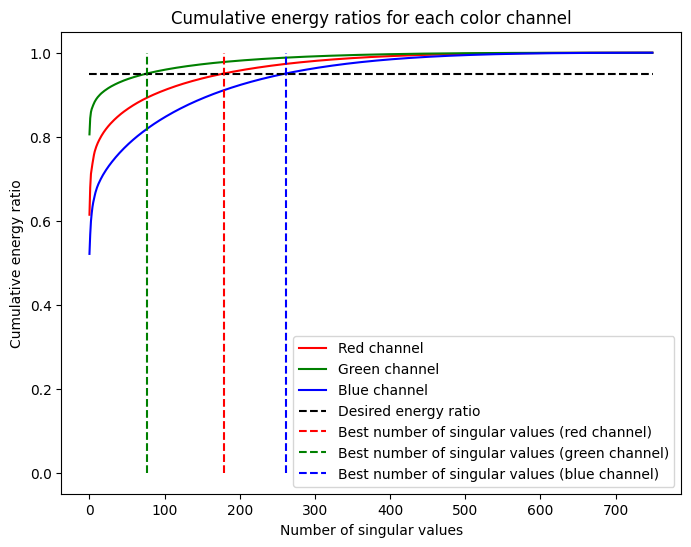

77

In [ ]:
img = cv2.imread('./assets/low2.jpg')

# Plot cumulative energy ratios for each color channel
plot_cumulative_energy(img, energy_ratio=0.95)

Merge Channels

In [ ]:
compressed_array = [b_compressed, g_compressed, r_compressed]

merged = cv2.merge(compressed_array)

Save merged matrix as an Image

In [ ]:
compressed_size, path = save_image(merged, image_type, onlySize=False)
Image(filename=path)